In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
from patsy import dmatrices
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split

data= sm.datasets.fair.load_pandas().data

In [2]:
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


- rate_marriage: woman's rating of her marriage (1 = very poor, 5 =very good) #ordinal data
- age: woman's age
- yrs_married: number of years married
- children: number of children
- religious: woman's rating of how religious she is (1 = not religious, 4 =strongly religious) #ordinal
- educ: level of education (9 = grade school, 12 = high school, 14 =
- some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree) #ordinal
- occupation: woman's occupation (1 = student, 2 = farming/semiskilled/unskilled, 3 = "white collar", 4 =
    teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =professional with advanced degree)  #nominal 
- occupation_husb: husband's occupation (same coding as above) #nominal
- affairs: time spent in extra-marital affairs

In [3]:
#add new col affair -->derived from affairs
data.loc[(data['affairs']>0),'affair']=1
data.loc[data['affairs']<=0,'affair']=0

In [4]:
#check for stats
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   float64
dtypes: float64(10)
memory usage: 497.5 KB


In [6]:
# check for missing values
data.isnull().sum() #no missing values

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [7]:
affair=data['affair'].value_counts()
affair

0.0    4313
1.0    2053
Name: affair, dtype: int64

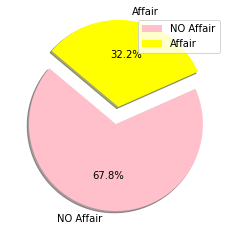

In [8]:
explode=[0,0.2]
labels='NO Affair','Affair'
colors=['pink','yellow']
autopct='%1.1f%%'
patches=plt.pie(affair,explode=explode,colors=colors,autopct=autopct,shadow=True,startangle=140,labels=labels)
plt.legend(loc="upper right")
plt.show()



- 32.2% women has affair 

In [9]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1.0


C:\Users\Krishna Desai\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rate_marriage', ylabel='affair'>

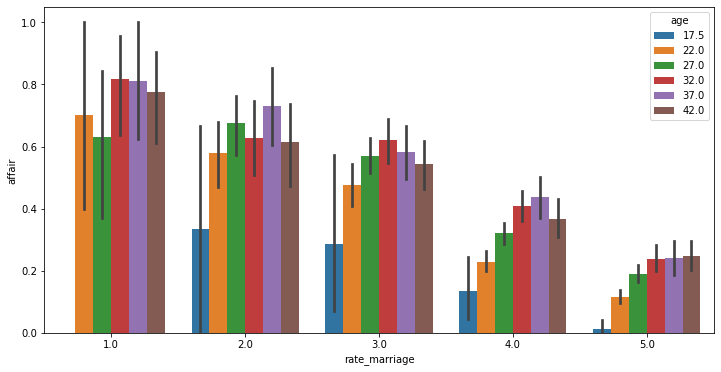

In [10]:
# affiar based on age
plt.figure(figsize=(12,6))
sb.barplot(data['rate_marriage'],data['affair'],hue=data['age'])

- majority women with poor marriage life got affair
- rate of affair accur between age of 32 to 37.

C:\Users\Krishna Desai\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yrs_married', ylabel='affair'>

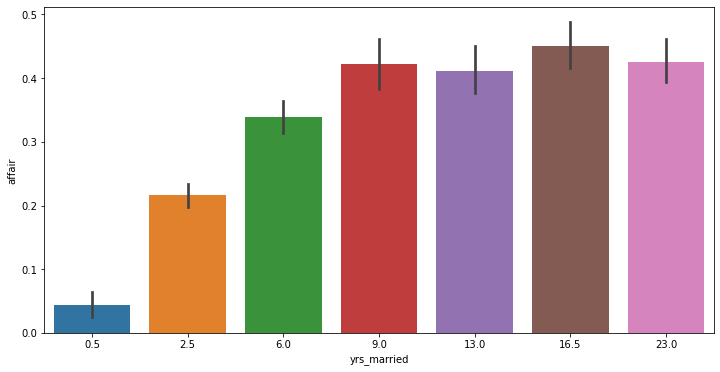

In [11]:
# affiar based on yrs_married
plt.figure(figsize=(12,6))
sb.barplot(data['yrs_married'],data['affair'])

-  as the yrs of marriage increase the chance of affair is also increase.

In [12]:
# children Vs Affair

C:\Users\Krishna Desai\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

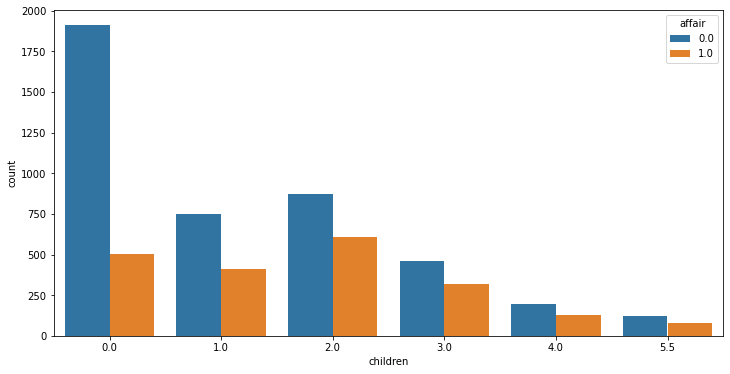

In [13]:
plt.figure(figsize=(12,6))
sb.countplot(data['children'],hue=data['affair'])

- women with no childen has higher chance of affair


C:\Users\Krishna Desai\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='religious', ylabel='affair'>

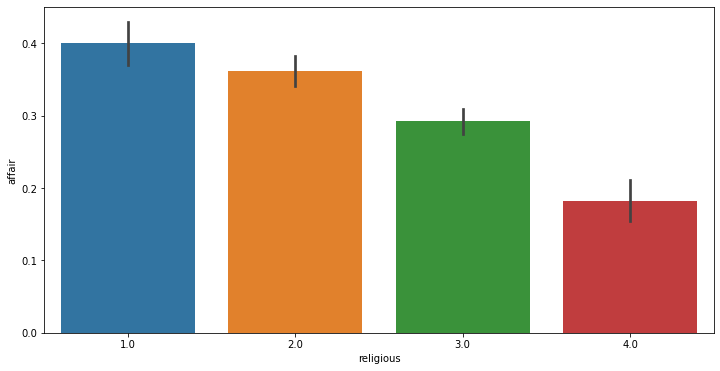

In [14]:
plt.figure(figsize=(12,6))
sb.barplot(data['religious'],data['affair'])

- women not religious has highest chance of affair 

C:\Users\Krishna Desai\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educ', ylabel='affair'>

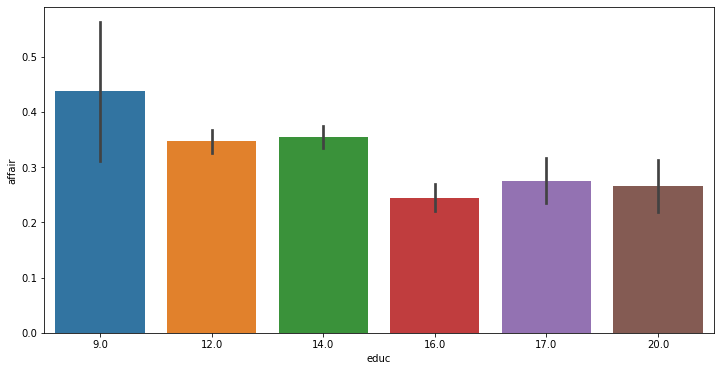

In [15]:
#education vs Affair
plt.figure(figsize=(12,6))
sb.barplot(data['educ'],data['affair'])

- it shows how education effect the affair rate
- highly educated woman has a less affair rate compare to (9,12,14 level of education)

C:\Users\Krishna Desai\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educ', ylabel='count'>

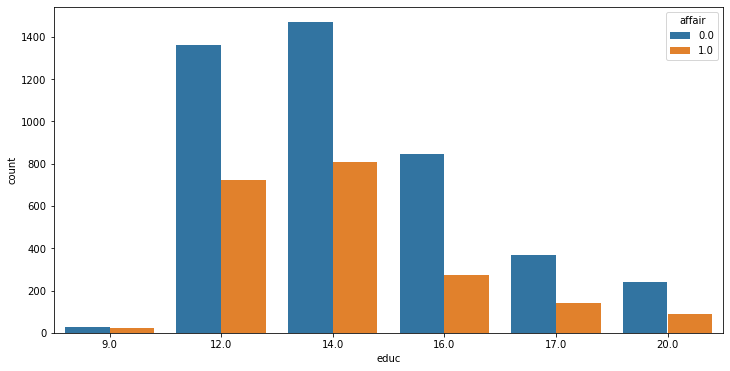

In [16]:
#education vs Affair
plt.figure(figsize=(12,6))
sb.countplot(data['educ'],hue=data['affair'])


- there are very less woamen who has a higher education
- woamen in college and high-school has higher rate if affair

C:\Users\Krishna Desai\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation', ylabel='count'>

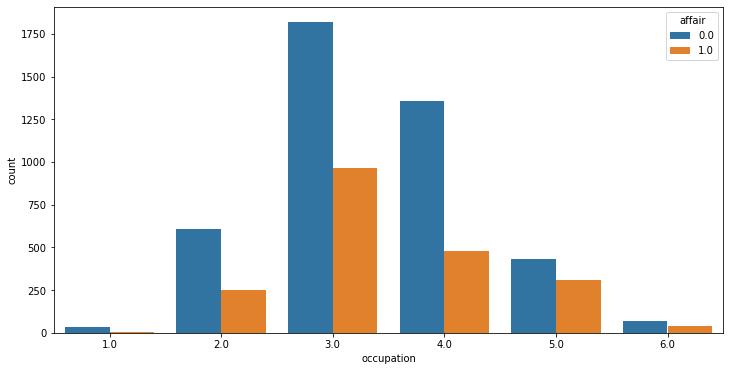

In [17]:
#education vs Affair
plt.figure(figsize=(12,6))
sb.countplot(data['occupation'],hue=data['affair'])

- women with occupation white collar job has higher rate of affair

C:\Users\Krishna Desai\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation_husb', ylabel='affair'>

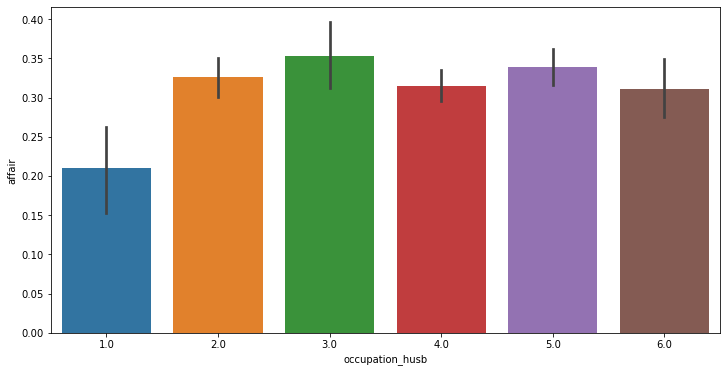

In [18]:
#education vs Affair
plt.figure(figsize=(12,6))
sb.barplot(data['occupation_husb'],data['affair'])

- husbund occupation does not make any difference in rate of affairs gain

In [19]:
#add new col maturity -->derived from affairs
data.loc[(data['age']<=18),'maturity']=1 #immature
data.loc[(data['age']>18),'maturity']=0  #mature

In [20]:
maturtiy=data.maturity.value_counts()
maturtiy

0.0    6227
1.0     139
Name: maturity, dtype: int64

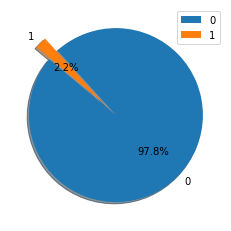

In [21]:
explode=[0,0.2]
labels='0','1'
autopct='%1.1f%%'
patches=plt.pie(maturtiy,explode=explode,autopct=autopct,shadow=True,startangle=140,labels=labels)
plt.legend(loc="upper right")
plt.show()


C:\Users\Krishna Desai\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='maturity', ylabel='affair'>

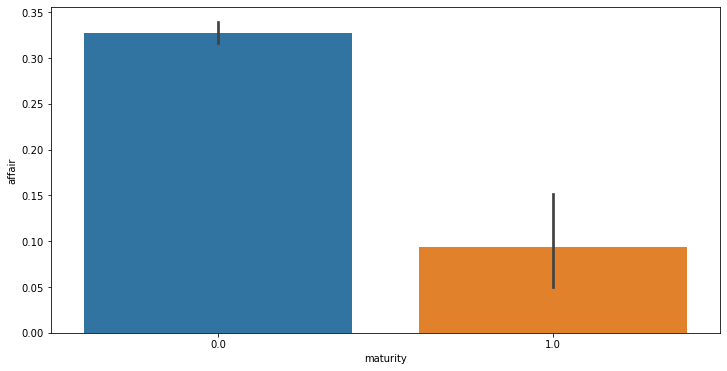

In [22]:
plt.figure(figsize=(12,6))
sb.barplot(data['maturity'],data['affair'])

- woamen with age<18 has less rate of affair.


In [23]:
# check of mullinearity 
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair,maturity
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1.0,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1.0,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1.0,0.0


<AxesSubplot:xlabel='age', ylabel='Count'>

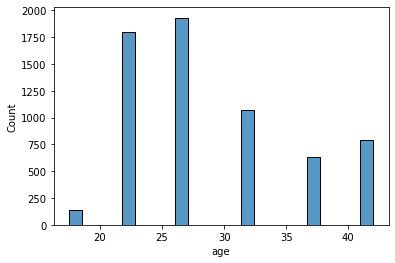

In [32]:
# check for normality
sb.histplot(data['age'])

C:\Users\Krishna Desai\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='affairs'>

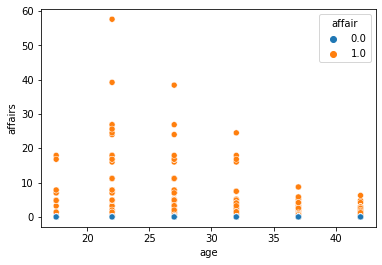

In [35]:
sb.scatterplot(data['age'],data['affairs'],hue=data['affair'])

<AxesSubplot:>

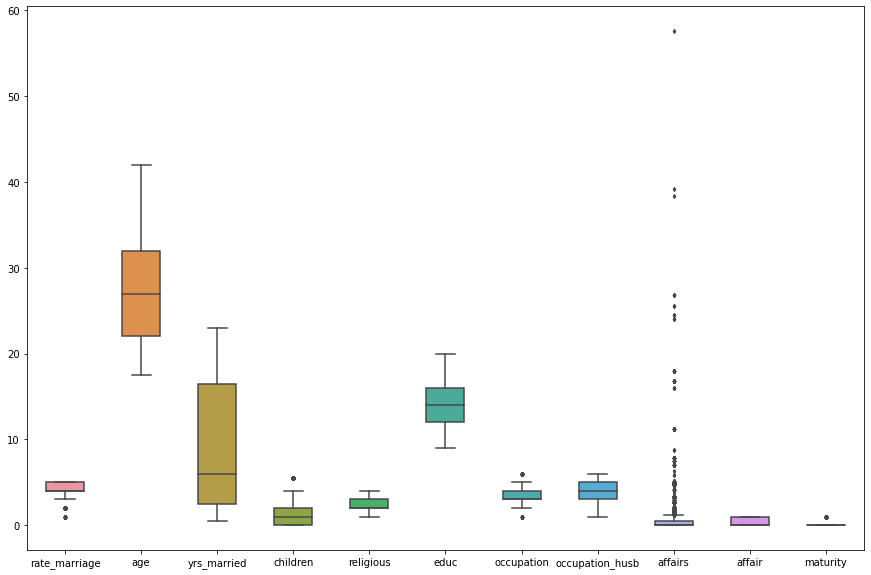

In [36]:
#chech for outliears
fig, ax = plt.subplots(figsize=(15,10))
sb.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [39]:
# affairs features has few amount of outliers

q = data['affairs'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned=data[data['affairs']<q]

<AxesSubplot:>

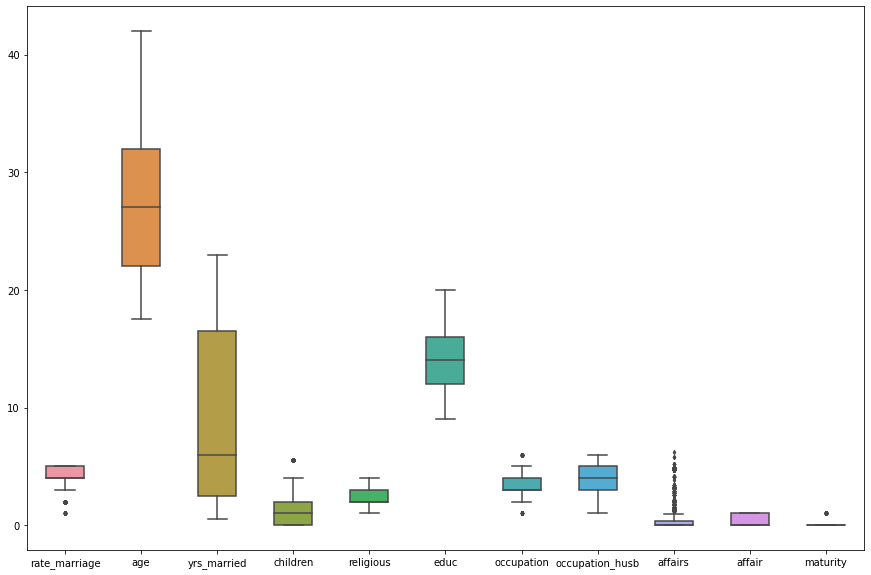

In [40]:
# after removing outliears
fig, ax = plt.subplots(figsize=(15,10))
sb.boxplot(data=data_cleaned, width= 0.5,ax=ax,  fliersize=3)

In [42]:
#how much feature are correlated to eachother
data=data_cleaned

In [44]:
#check for correalation
t=data.corr()['affair'][:]
t


rate_marriage     -0.326157
age                0.174799
yrs_married        0.234713
children           0.185964
religious         -0.115247
educ              -0.077735
occupation         0.031831
occupation_husb    0.023486
affairs            0.672794
affair             1.000000
maturity          -0.081521
Name: affair, dtype: float64

In [46]:
X=data.drop('affair',axis=1)
y=data.affair

In [47]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_scaled=scale.fit_transform(X)

#check the VIF factor 
#if VIF factor in <5 that means there is no colinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['feature']=X.columns
vif

,VIF,feature
0,1.100770,rate_marriage
1,5.797698,age
2,7.297345,yrs_married
3,2.524171,children
4,1.042356,religious
5,1.300892,educ
6,1.212210,occupation
7,1.084828,occupation_husb
8,1.084370,affairs
9,1.107547,maturity


In [48]:
data.drop('yrs_married',axis=1,inplace=True)

C:\Users\Krishna Desai\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.25, random_state = 355)
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)


C:\Users\Krishna Desai\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
y_pred = log_reg.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,confusion_matrix

In [54]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9781631342324983

In [56]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1073,    0],
       [  34,  450]], dtype=int64)

In [57]:
true_positive=cm[0][0]
true_negative=cm[1][1]
false_positive=cm[0][1]
false_negative=cm[1][0]


In [59]:
#accuracy
accuracy=(true_positive+true_negative)/(true_positive+true_negative+false_negative+false_positive)
accuracy

0.9781631342324983

In [61]:
#Recall
Recall=true_positive/(true_positive+false_negative)
Recall

0.969286359530262

In [66]:
#precision
precision=true_positive/(true_positive+false_positive)
precison

1.0

In [68]:
# F1 Score
F1_Score = 2*(Recall * precision) / (Recall + precision)
F1_Score

0.9844036697247707

In [70]:
# area under the curve
auc=roc_auc_score(y_test,y_pred)
auc

0.9648760330578512

In [ ]:
#ROC

In [71]:
fpr,tpr,thresolds=roc_curve(y_test,y_pred)

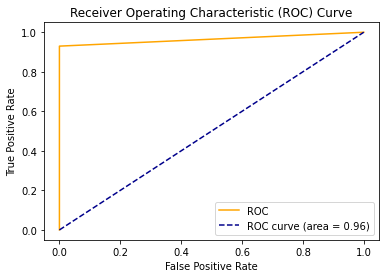

In [72]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()